**Juan Carlos VW - 0706022210044**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [46]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [47]:
url = "https://raw.githubusercontent.com/juancarlosvw/DATAMINING/refs/heads/main/bank.csv"
dataset = pd.read_csv(url,sep=';')
#dataset.sample(n=10)
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [49]:
  dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [50]:
col_names = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome','y']
for col in col_names:
  print(dataset[col].value_counts(dropna=False))

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
no     4445
yes      76
Name: default, dtype: int64
yes    2559
no     1962
Name: housing, dtype: int64
no     3830
yes     691
Name: loan, dtype: int64
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64
unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64
no     4000
yes     521
Name: y, dtype: int64

In [51]:
dataset.replace('unknown', pd.NA, inplace=True)


dataset_cleaned = dataset.dropna()

print(dataset_cleaned)

      age            job  marital  education default  balance housing loan  \
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
5      35     management   single   tertiary      no      747      no   no   
6      36  self-employed  married   tertiary      no      307     yes   no   
9      43       services  married    primary      no      -88     yes  yes   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4492   32     technician   single  secondary      no      309     yes  yes   
4504   42    blue-collar   single  secondary      no     1080     yes  yes   
4514   38    blue-collar  married  secondary      no     1205     yes   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [52]:
print(dataset['y'].unique())

['no' 'yes']


In [54]:

dataset['job'] = dataset['job'].replace({'admin.': 'admin_management', 'management': 'admin_management'})

print(dataset[['age', 'job']])

      age               job
0      30        unemployed
1      33          services
2      35  admin_management
3      30  admin_management
4      59       blue-collar
...   ...               ...
4516   33          services
4517   57     self-employed
4518   57        technician
4519   28       blue-collar
4520   44      entrepreneur

[4521 rows x 2 columns]


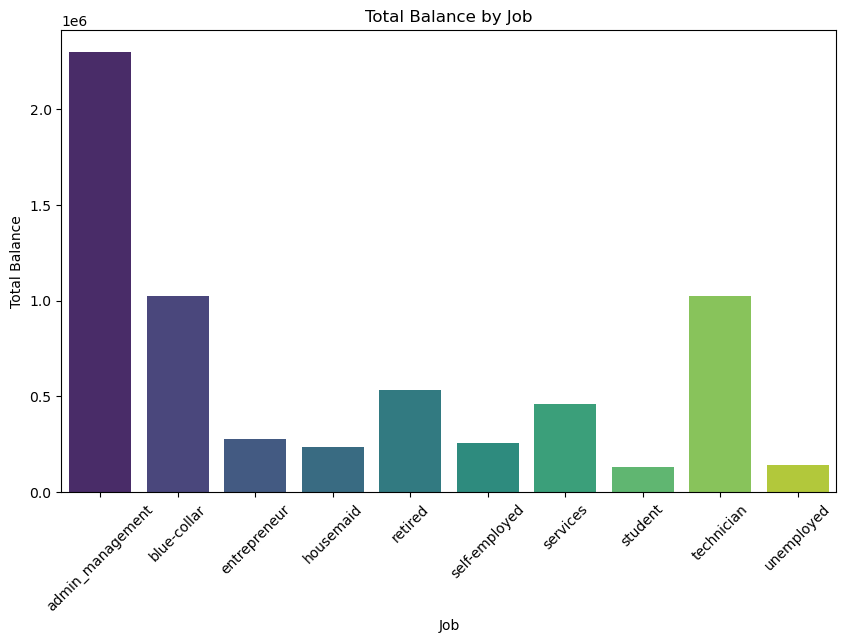

In [62]:
balance_by_job = dataset.groupby('job')['balance'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=balance_by_job, x='job', y='balance', palette='viridis')
plt.title('Total Balance by Job')
plt.xlabel('Job')
plt.ylabel('Total Balance')
plt.xticks(rotation=45)
plt.show()

#this bar chart, to see total of balances on each job. admin_management has the most balances over all other job

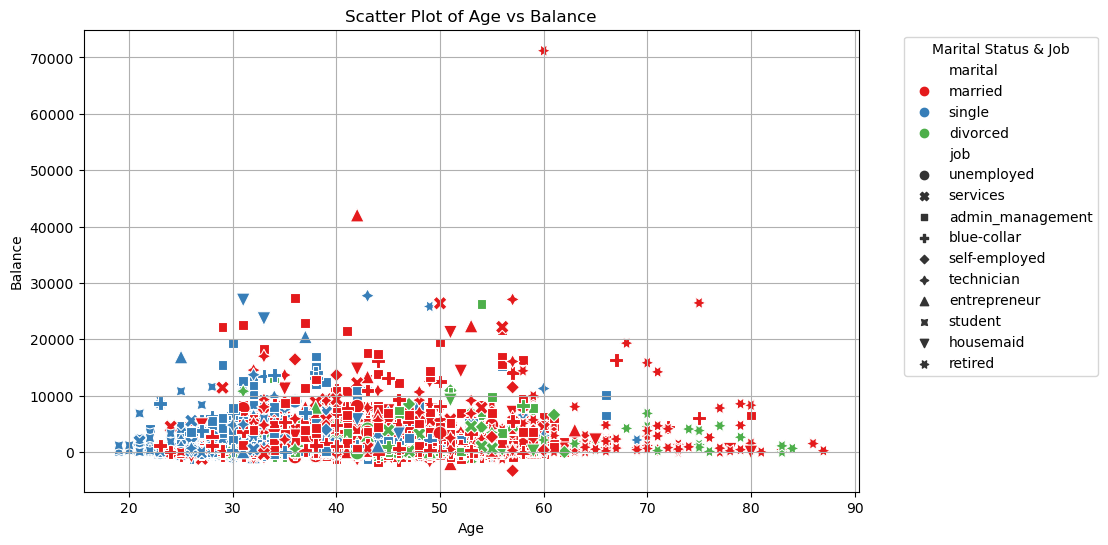

In [76]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='age', y='balance', hue='marital', style='job', palette='Set1', s=100)
plt.title('Scatter Plot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Marital Status & Job', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

#to see balances over age status

In [78]:
print(dataset['y'].unique())

['no' 'yes']


In [87]:

dataset_encoded = pd.get_dummies(dataset, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'], drop_first=True)


dataset_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [88]:
le_species = LabelEncoder()
dataset['y'] = le_species.fit_transform(dataset['y'])
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,<NA>,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,admin_management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,admin_management,married,tertiary,no,1476,yes,yes,<NA>,3,jun,199,4,-1,0,<NA>,0
4,59,blue-collar,married,secondary,no,0,yes,no,<NA>,5,may,226,1,-1,0,<NA>,0


C:\Users\M.S.I\AppData\Local\Temp\ipykernel_16828\4281581775.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


<Axes: >

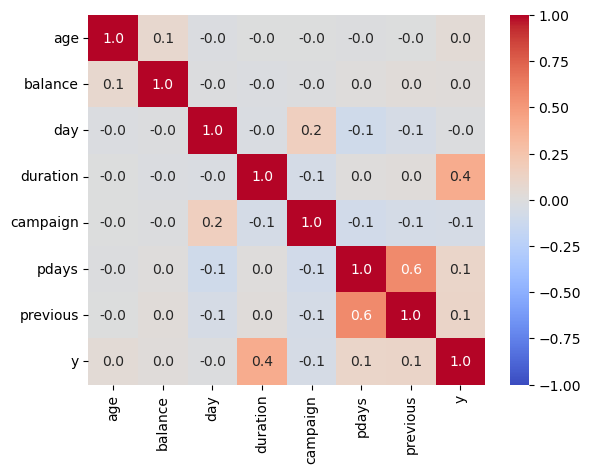

In [90]:
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt="0.1f", vmin=-1, vmax=1)

## Machine Learning

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
# Encode variabel kategorikal
label_encoders = {}
for column in dataset.select_dtypes(include='object').columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

X = dataset.drop('y', axis=1)
y = dataset['y']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
X_train.shape, X_test.shape

((3616, 16), (905, 16))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [119]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [120]:
y_pred = model.predict(X_test)

In [122]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


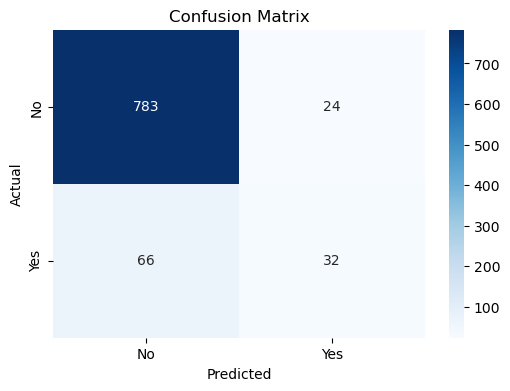

In [123]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       807
           1       0.57      0.33      0.42        98

    accuracy                           0.90       905
   macro avg       0.75      0.65      0.68       905
weighted avg       0.88      0.90      0.89       905



In [ ]:
#classifier random forest menghasilkan akurasi sebesar 0.90, yang berarti dapat melakukan prediksi dengan tepat 90% data
#Akurasi Tinggi pada Kelas "No" sebesar 783
#Precision: 0.92, artinya dari semua prediksi kelas "0," sebanyak 92% benar.
#Recall: 0.97, artinya model berhasil mendeteksi 97% dari semua instance yang sebenarnya "0."

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [128]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [130]:
y_pred = model.predict(X_test)

In [131]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


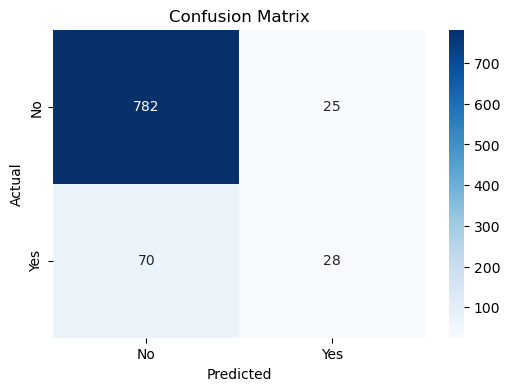

In [133]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.53      0.29      0.37        98

    accuracy                           0.90       905
   macro avg       0.72      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



In [ ]:
#classifier random forest menghasilkan akurasi sebesar 0.90, yang berarti dapat melakukan prediksi dengan tepat 90% data
#Akurasi Tinggi pada Kelas "No" sebesar 782
#Precision: 0.92, artinya dari semua prediksi kelas "0," sebanyak 92% benar.
#Recall: 0.97, artinya model berhasil mendeteksi 97% dari semua instance yang sebenarnya "0."